In [1]:
import pickle, pprint
import math
import netCDF4
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import stats
from scipy.ndimage import gaussian_filter
import pandas as pd
from tabulate import tabulate
import xarray as xr
import dask
import seaborn as sns

import matplotlib
from matplotlib.gridspec import GridSpec
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.image as imag
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as mticker
import types

import matplotlib.transforms as mtrans
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch

import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs

import csv
import pandas as pd
import os

In [2]:
def bottom_offset(self, bboxes, bboxes2):
    bottom = self.axes.bbox.ymin
    self.offsetText.set(va="top", ha="left")
    self.offsetText.set_position(
            (0, bottom - self.OFFSETTEXTPAD * self.figure.dpi / 72.0))


def register_bottom_offset(axis, func):
    axis._update_offset_text_position = types.MethodType(func, axis)

In [3]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

z = 30

In [6]:
others = netCDF4.Dataset("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-72000.nc")
lons = np.array(others.variables['lon'])
lats = np.array(others.variables['lat'])
Xvar, Yvar = np.meshgrid(lons, lats)

# Model Trained from 3 Months of Summer Data

## Test data from summer

In [14]:
SPCAM5_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_SPCAM5.npy")
CONSTRAINED_nan_map_lst = np.load("Data_For_Paper/Trial_ReLU_Summer.npy")
Sigmoid_nan_map_lst = np.load("Data_For_Paper/Summer_Sigmoid_Summer.npy")
Softplus_nan_map_lst = np.load("Data_For_Paper/Summer_Softplus_Summer.npy")
Exponential_nan_map_lst = np.load("Data_For_Paper/Summer_Softplus_Summer.npy")

Text(0.52, 0.94, 'Constrained NNs Comparison by time of Daily Maximum Precipitation')

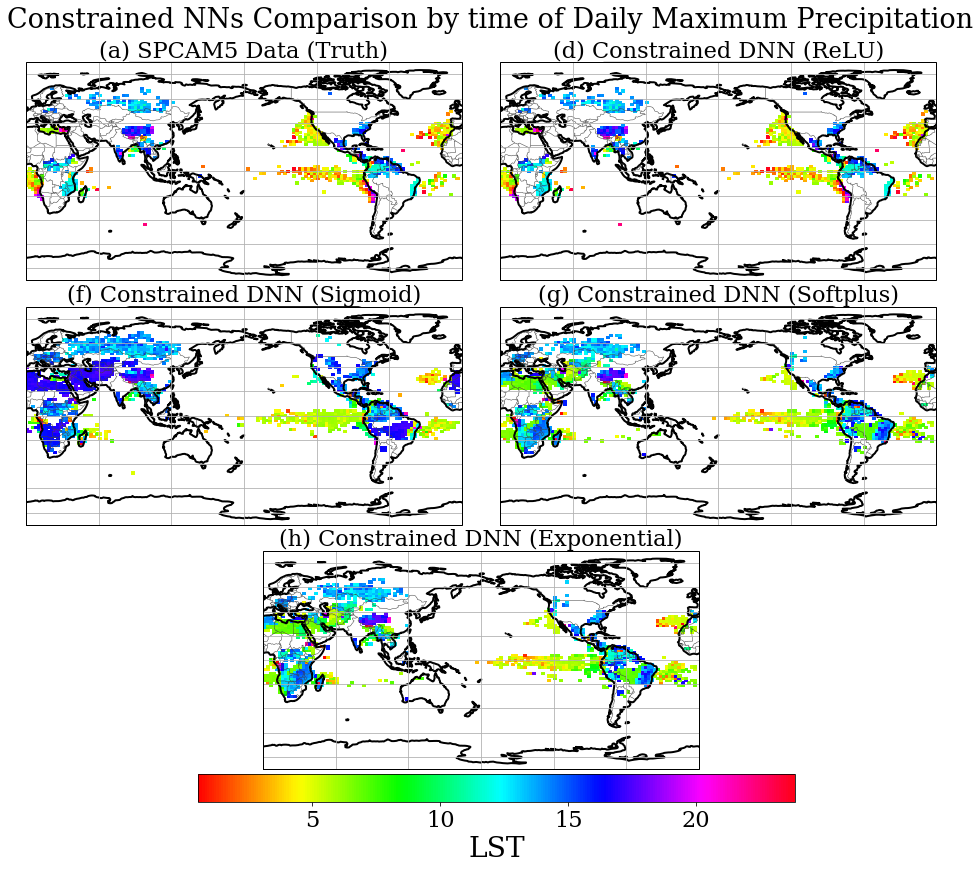

In [15]:
fig, ax = plt.subplots(3,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(17,13)

gs=GridSpec(3,2) # 2 rows,  columns

ax1=fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax2=fig.add_subplot(gs[0,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, second column 
ax3=fig.add_subplot(gs[1,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax4=fig.add_subplot(gs[1,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax5=fig.add_subplot(gs[2,:],projection=ccrs.PlateCarree(central_longitude=180)) # Second row, span all columns
ax6=fig.add_subplot(gs[2,1],projection=ccrs.PlateCarree(central_longitude=180))

contour_plot = ax1.pcolormesh(Xvar, Yvar, SPCAM5_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour")
ax1.set_title('(a) SPCAM5 Data (Truth)', fontsize = fz)
ax1.coastlines(linewidth=2.0,edgecolor='0.25')
ax1.gridlines()
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax2.pcolormesh(Xvar, Yvar, CONSTRAINED_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax2.set_title('(d) Constrained DNN (ReLU)', fontsize = fz)
ax2.coastlines(linewidth=2.0,edgecolor='0.25')
ax2.gridlines()
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax3.pcolormesh(Xvar, Yvar, Sigmoid_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax3.set_title('(f) Constrained DNN (Sigmoid)', fontsize = fz)
ax3.coastlines(linewidth=2.0,edgecolor='0.25')
ax3.gridlines()
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax4.pcolormesh(Xvar, Yvar, Softplus_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax4.set_title('(g) Constrained DNN (Softplus)', fontsize = fz)
ax4.coastlines(linewidth=2.0,edgecolor='0.25')
ax4.gridlines()
ax4.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax5.pcolormesh(Xvar, Yvar, Exponential_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax5.set_title('(h) Constrained DNN (Exponential)', fontsize = fz)
ax5.coastlines(linewidth=2.0,edgecolor='0.25')
ax5.gridlines()
ax5.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

ax6.set_visible(False)
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,0])

p0 = ax1.get_position().get_points().flatten()
p2 = ax1.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.15, 0.09, p0[1]-0.17, 0.03])
cbar = fig.colorbar(contour_plot, cax=ax_cbar, orientation='horizontal')
cbar.set_label('LST', fontsize=fz*1.25)
plt.subplots_adjust(hspace=0.12, wspace=0)
plt.suptitle("Constrained NNs Comparison by time of Daily Maximum Precipitation", y=0.94, x=0.52, fontsize = fz*1.2)
#plt.savefig("Revised_Figures/Figure8_Constrained_Only.png")
#plt.savefig("Revised_Figures/Figure8_Constrained_Only.pdf")
#plt.savefig("Revised_Figures/Figure8_Constrained_Only.jpg")

In [ ]:
CON = np.load("Data_For_Paper/Summer_Constrained_DNN_Precip_Prediction.npy")
T = np.load("Data_For_Paper/Summer_SPCAM5_Prepip_Truth.npy")
Exponential = np.load("Data_For_Paper/Paper_Summer_SPCAM5_Prepip_Exponential_PDF.npy")
Softplus = np.load("Data_For_Paper/Paper_Summer_SPCAM5_Precip_Softplus_PDF.npy")
Sigmoid = np.load("Data_For_Paper/Paper_Summer_SPCAM5_Precip_Sigmoid_PDF.npy")
m = np.load("Data_For_Paper/Summer_Precip_Max_Scalar.npy")
M = np.load("Data_For_Paper/Summer_Precip_Min_Scalar.npy")

CON_ocean = np.load("Data_For_Paper/Summer_Constrained_Ocean_SPCAM5_Precip_Prediction.npy")
Exponential_ocean = np.load("Data_For_Paper/Paper_Summer_Ocean_SPCAM5_Prepip_Exponential_PDF.npy")
Softplus_ocean = np.load("Data_For_Paper/Paper_Summer_Ocean_SPCAM5_Precip_Softplus_PDF.npy")
Sigmoid_ocean = np.load("Data_For_Paper/Paper_Summer_Ocean_SPCAM5_Precip_Sigmoid_PDF.npy")
T_ocean = np.load("Data_For_Paper/Summer_Ocean_SPCAM5_Prepip_Truth.npy")
m_ocean = np.load("Data_For_Paper/Summer_Ocean_Precip_Max_Scalar.npy")
M_ocean = np.load("Data_For_Paper/Summer_Ocean_Precip_Min_Scalar.npy")

CON_land = np.load("Data_For_Paper/Summer_Constrained_Land_SPCAM5_Precip_Prediction.npy")
Exponential_land = np.load("Data_For_Paper/Paper_Summer_Land_SPCAM5_Prepip_Exponential_PDF.npy")
Softplus_land = np.load("Data_For_Paper/Paper_Summer_Land_SPCAM5_Precip_Softplus_PDF.npy")
Sigmoid_land = np.load("Data_For_Paper/Paper_Summer_Land_SPCAM5_Precip_Sigmoid_PDF.npy")
T_land = np.load("Data_For_Paper/Summer_Land_SPCAM5_Prepip_Truth.npy")
m_land = np.load("Data_For_Paper/Summer_Land_Precip_Max_Scalar.npy")
M_land = np.load("Data_For_Paper/Summer_Land_Precip_Min_Scalar.npy")

In [ ]:
bins = array_generator(0.03, M, 1.03)

fig, ax = plt.subplots(3,2,figsize=(15,15))

shared_bins = np.histogram_bin_edges(D, bins=bins, range=(0, M))
freq, edges = np.histogram(D, bins = shared_bins, density=True)
#bad_freq, bad_edges = np.histogram(bad_feat, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON, bins = shared_bins, density=True)
freq_Linear_Baseline, edges_Linear_Baseline = np.histogram(Linear_Baseline, bins = shared_bins, density=True)
freq_Exponential, edges_Exponential = np.histogram(Exponential, bins = shared_bins, density=True)
freq_Softplus, edges_Softplus = np.histogram(Softplus, bins = shared_bins, density=True)
freq_Sigmoid, edges_Sigmoid = np.histogram(Sigmoid, bins = shared_bins, density=True)


ax[0,1].set_xscale("log")
ax[1,1].set_xscale("log")
ax[2,1].set_xscale("log")

ax[0,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), label = "SPCAM5 Data ", color = 'green')
ax[0,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), label = "ReLU NN", color = 'brown', linestyle='--')
ax[0,0].plot(edges_Exponential[:-1], freq_Exponential/np.sum(freq_Exponential), label = "Exponential NN", color = 'yellow', linestyle='--')
ax[0,0].plot(edges_Softplus[:-1], freq_Softplus/np.sum(freq_Softplus), label = "Softplus NN", color = 'purple', linestyle='--')
ax[0,0].plot(edges_Sigmoid[:-1], freq_Sigmoid/np.sum(freq_Sigmoid), label = "Sigmoid NN", color = 'grey', linestyle='--')

ax[0,0].set_ylim(1e-8, 1)

ax[2,0].set_xlabel('Rate '+r'$\left(\mathrm{mm \ day^{-1}}\right)$', fontsize = fz)
ax[2,0].xaxis.set_label_coords(1.1,-0.1)
ax[1,0].set_ylabel('Probability'+r'$\left(\mathrm{day \ mm^{-1}}\right)$', fontsize = fz)
ax[0,0].set_title('(a) Global PDF', fontsize = fz)
ax[1,0].set_title('(c) Ocean PDF', fontsize = fz)
ax[2,0].set_title('(e) Land PDF', fontsize = fz)
ax[0,0].set_yscale('log')
ax[0,0].set_xticks([])
    
totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]
totals_Linear_Baseline = freq_Linear_Baseline*edges_Linear_Baseline[:-1]
totals_Exponential = freq_Exponential*edges_Exponential[:-1]
totals_Softplus = freq_Softplus*edges_Softplus[:-1]
totals_Sigmoid = freq_Sigmoid*edges_Sigmoid[:-1]
    
ax[0,1].plot(edges_targ[:-1], totals_targ, label = "SPCAM5 Data", color = 'green')
ax[0,1].plot(edges_CON[:-1], totals_CON, label = "ReLU NN", color = 'brown', linestyle='--')
ax[0,1].plot(edges_Exponential[:-1], totals_Exponential, label = "Exponential NN", color = 'yellow', linestyle='--')
ax[0,1].plot(edges_Softplus[:-1], totals_Softplus, label = "Softplus NN", color = 'purple', linestyle='--')
ax[0,1].plot(edges_Sigmoid[:-1], totals_Sigmoid, label = "Sigmoid NN", color = 'grey', linestyle='--')



ax[1,1].set_ylabel('Amount '+r'$\left(\mathrm{mm \ day^{-1}}\right)$', fontsize = fz)
ax[0,1].set_title('(b) Global Amount Distribution', fontsize = fz)
ax[1,1].set_title('(d) Ocean Amount Distribution', fontsize = fz)
ax[2,1].set_title('(f) Land Amount Distribution', fontsize = fz)
ax[0,0].legend(fontsize=fz*0.65, loc = 'best', ncol=2)

ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()
ax[0,1].set_xticks([])
ax[0,1].set_ylim(0, 0.65)

shared_bins = np.histogram_bin_edges(D_ocean, bins=bins, range=(0, M))
freq, edges = np.histogram(D_ocean, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T_ocean, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C_ocean, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON_ocean, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON_ocean, bins = shared_bins, density=True)
freq_Linear_Baseline, edges_Linear_Baseline = np.histogram(Linear_Baseline_ocean, bins = shared_bins, density=True)
freq_Exponential, edges_Exponential = np.histogram(Exponential_ocean, bins = shared_bins, density=True)
freq_Softplus, edges_Softplus = np.histogram(Softplus_ocean, bins = shared_bins, density=True)
freq_Sigmoid, edges_Sigmoid = np.histogram(Sigmoid_ocean, bins = shared_bins, density=True)

ax[1,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), color = 'green')
ax[1,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), color = 'brown', linestyle='--')
ax[1,0].plot(edges_Exponential[:-1], freq_Exponential/np.sum(freq_Exponential), color = 'yellow', linestyle='--')
ax[1,0].plot(edges_Softplus[:-1], freq_Softplus/np.sum(freq_Softplus), color = 'purple', linestyle='--')
ax[1,0].plot(edges_Sigmoid[:-1], freq_Sigmoid/np.sum(freq_Sigmoid), color = 'grey', linestyle='--')

ax[1,0].set_xticks([])
ax[1,0].set_yscale('log')
ax[1,0].set_ylim(1e-8, 1)

totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]
totals_Linear_Baseline = freq_Linear_Baseline*edges_Linear_Baseline[:-1]
totals_Exponential = freq_Exponential*edges_Exponential[:-1]
totals_Softplus = freq_Softplus*edges_Softplus[:-1]
totals_Sigmoid = freq_Sigmoid*edges_Sigmoid[:-1]

ax[1,1].plot(edges_targ[:-1], totals_targ, color = 'green')
ax[1,1].plot(edges_CON[:-1], totals_CON, color = 'brown', linestyle='--')
ax[1,1].plot(edges_Exponential[:-1], totals_Exponential, color = 'yellow', linestyle='--')
ax[1,1].plot(edges_Softplus[:-1], totals_Softplus, color = 'purple', linestyle='--')
ax[1,1].plot(edges_Sigmoid[:-1], totals_Sigmoid, color = 'grey', linestyle='--')

ax[1,1].set_xticks([])
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
ax[1,1].set_ylim(0, 0.65)

shared_bins = np.histogram_bin_edges(D_land, bins=bins, range=(0, M))
freq, edges = np.histogram(D_land, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T_land, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C_land, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON_land, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON_land, bins = shared_bins, density=True)
freq_Linear_Baseline, edges_Linear_Baseline = np.histogram(Linear_Baseline_land, bins = shared_bins, density=True)
freq_Exponential, edges_Exponential = np.histogram(Exponential_land, bins = shared_bins, density=True)
freq_Softplus, edges_Softplus = np.histogram(Softplus_land, bins = shared_bins, density=True)
freq_Sigmoid, edges_Sigmoid = np.histogram(Sigmoid_land, bins = shared_bins, density=True)

ax[2,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), color = 'green')
ax[2,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), color = 'brown', linestyle='--')
ax[2,0].plot(edges_Exponential[:-1], freq_Exponential/np.sum(freq_Exponential), color = 'yellow', linestyle='--')
ax[2,0].plot(edges_Softplus[:-1], freq_Softplus/np.sum(freq_Softplus), color = 'purple', linestyle='--')
ax[2,0].plot(edges_Sigmoid[:-1], freq_Sigmoid/np.sum(freq_Sigmoid), color = 'grey', linestyle='--')
ax[2,0].set_yscale('log')
ax[2,0].set_ylim(1e-8, 1)

totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]
totals_Linear_Baseline = freq_Linear_Baseline*edges_Linear_Baseline[:-1]
totals_Exponential = freq_Exponential*edges_Exponential[:-1]
totals_Softplus = freq_Softplus*edges_Softplus[:-1]
totals_Sigmoid = freq_Sigmoid*edges_Sigmoid[:-1]

ax[2,1].plot(edges_targ[:-1], totals_targ, color = 'green')
ax[2,1].plot(edges_CON[:-1], totals_CON, color = 'brown', linestyle='--')
ax[2,1].plot(edges_Exponential[:-1], totals_Exponential, color = 'yellow', linestyle='--')
ax[2,1].plot(edges_Softplus[:-1], totals_Softplus, color = 'purple', linestyle='--')
ax[2,1].plot(edges_Sigmoid[:-1], totals_Sigmoid, color = 'grey', linestyle='--')
ax[2,1].yaxis.set_label_position("right")
ax[2,1].yaxis.tick_right()
ax[2,1].set_ylim(0, 0.65)
plt.suptitle("Precipitation", y=0.93)
plt.subplots_adjust(wspace=0.01, hspace=0.10)

#plt.savefig("Revised_Figures/Figure9_Constrained.png")
#plt.savefig("Revised_Figures/Figure9_Constrained.pdf")

## Test Data from Winter

In [16]:
SPCAM5_nan_map_lst = np.load("Data_For_Paper/Trial_SPCAM5_Winter.npy")
CONSTRAINED_nan_map_lst = np.load("Data_For_Paper/Trial_ReLU_Winter.npy")
Sigmoid_nan_map_lst = np.load("Data_For_Paper/Summer_Sigmoid_Winter.npy")
Softplus_nan_map_lst = np.load("Data_For_Paper/Summer_Softplus_Winter.npy")
Exponential_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_Exponential.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'Data_For_Paper/Summer_Sigmoid_Winter.npy'

Text(0.52, 0.94, 'Constrained NNs Comparison by time of Daily Maximum Precipitation')

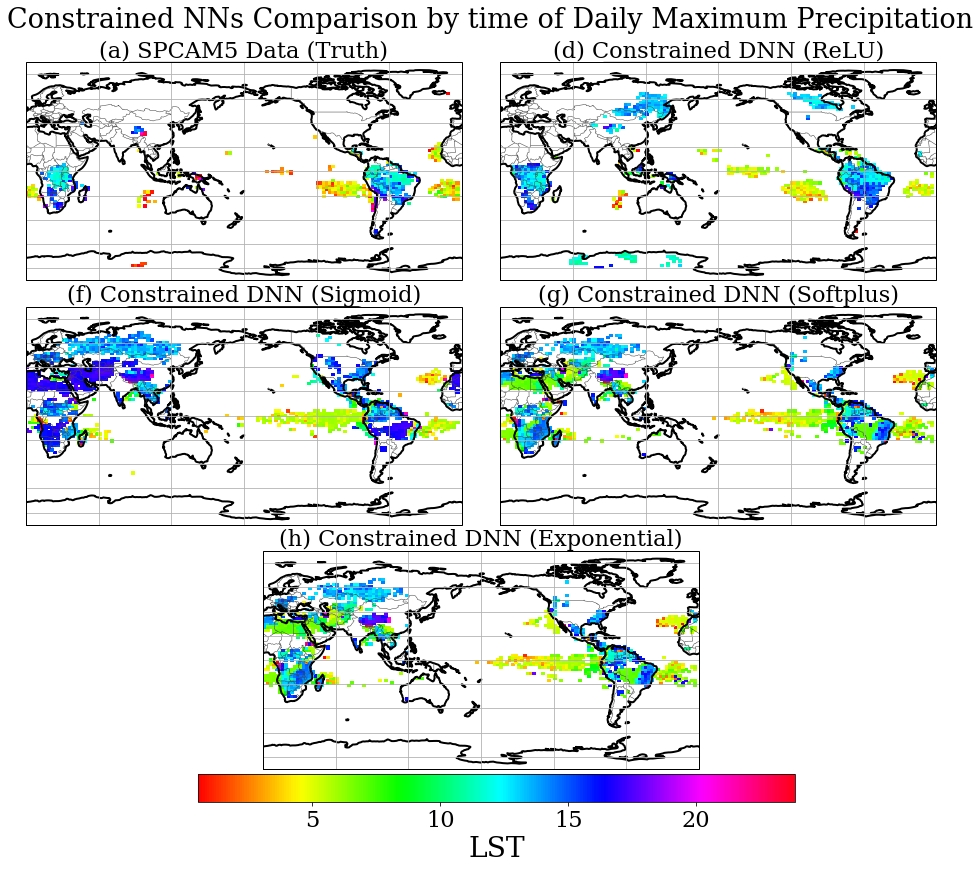

In [17]:
fig, ax = plt.subplots(3,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(17,13)

gs=GridSpec(3,2) # 2 rows,  columns

ax1=fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax2=fig.add_subplot(gs[0,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, second column 
ax3=fig.add_subplot(gs[1,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax4=fig.add_subplot(gs[1,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax5=fig.add_subplot(gs[2,:],projection=ccrs.PlateCarree(central_longitude=180)) # Second row, span all columns
ax6=fig.add_subplot(gs[2,1],projection=ccrs.PlateCarree(central_longitude=180))

contour_plot = ax1.pcolormesh(Xvar, Yvar, SPCAM5_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour")
ax1.set_title('(a) SPCAM5 Data (Truth)', fontsize = fz)
ax1.coastlines(linewidth=2.0,edgecolor='0.25')
ax1.gridlines()
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax2.pcolormesh(Xvar, Yvar, CONSTRAINED_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax2.set_title('(d) Constrained DNN (ReLU)', fontsize = fz)
ax2.coastlines(linewidth=2.0,edgecolor='0.25')
ax2.gridlines()
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax3.pcolormesh(Xvar, Yvar, Sigmoid_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax3.set_title('(f) Constrained DNN (Sigmoid)', fontsize = fz)
ax3.coastlines(linewidth=2.0,edgecolor='0.25')
ax3.gridlines()
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax4.pcolormesh(Xvar, Yvar, Softplus_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax4.set_title('(g) Constrained DNN (Softplus)', fontsize = fz)
ax4.coastlines(linewidth=2.0,edgecolor='0.25')
ax4.gridlines()
ax4.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax5.pcolormesh(Xvar, Yvar, Exponential_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax5.set_title('(h) Constrained DNN (Exponential)', fontsize = fz)
ax5.coastlines(linewidth=2.0,edgecolor='0.25')
ax5.gridlines()
ax5.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

ax6.set_visible(False)
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,0])

p0 = ax1.get_position().get_points().flatten()
p2 = ax1.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.15, 0.09, p0[1]-0.17, 0.03])
cbar = fig.colorbar(contour_plot, cax=ax_cbar, orientation='horizontal')
cbar.set_label('LST', fontsize=fz*1.25)
plt.subplots_adjust(hspace=0.12, wspace=0)
plt.suptitle("Constrained NNs Comparison by time of Daily Maximum Precipitation", y=0.94, x=0.52, fontsize = fz*1.2)
#plt.savefig("Revised_Figures/Figure8_Constrained_Only.png")
#plt.savefig("Revised_Figures/Figure8_Constrained_Only.pdf")
#plt.savefig("Revised_Figures/Figure8_Constrained_Only.jpg")

In [ ]:
CON = np.load("Data_For_Paper/Summer_Constrained_DNN_Precip_Prediction.npy")
T = np.load("Data_For_Paper/Summer_SPCAM5_Prepip_Truth.npy")
Exponential = np.load("Data_For_Paper/Paper_Summer_SPCAM5_Prepip_Exponential_PDF.npy")
Softplus = np.load("Data_For_Paper/Paper_Summer_SPCAM5_Precip_Softplus_PDF.npy")
Sigmoid = np.load("Data_For_Paper/Paper_Summer_SPCAM5_Precip_Sigmoid_PDF.npy")
m = np.load("Data_For_Paper/Summer_Precip_Max_Scalar.npy")
M = np.load("Data_For_Paper/Summer_Precip_Min_Scalar.npy")

CON_ocean = np.load("Data_For_Paper/Summer_Constrained_Ocean_SPCAM5_Precip_Prediction.npy")
Exponential_ocean = np.load("Data_For_Paper/Paper_Summer_Ocean_SPCAM5_Prepip_Exponential_PDF.npy")
Softplus_ocean = np.load("Data_For_Paper/Paper_Summer_Ocean_SPCAM5_Precip_Softplus_PDF.npy")
Sigmoid_ocean = np.load("Data_For_Paper/Paper_Summer_Ocean_SPCAM5_Precip_Sigmoid_PDF.npy")
T_ocean = np.load("Data_For_Paper/Summer_Ocean_SPCAM5_Prepip_Truth.npy")
m_ocean = np.load("Data_For_Paper/Summer_Ocean_Precip_Max_Scalar.npy")
M_ocean = np.load("Data_For_Paper/Summer_Ocean_Precip_Min_Scalar.npy")

CON_land = np.load("Data_For_Paper/Summer_Constrained_Land_SPCAM5_Precip_Prediction.npy")
Exponential_land = np.load("Data_For_Paper/Paper_Summer_Land_SPCAM5_Prepip_Exponential_PDF.npy")
Softplus_land = np.load("Data_For_Paper/Paper_Summer_Land_SPCAM5_Precip_Softplus_PDF.npy")
Sigmoid_land = np.load("Data_For_Paper/Paper_Summer_Land_SPCAM5_Precip_Sigmoid_PDF.npy")
T_land = np.load("Data_For_Paper/Summer_Land_SPCAM5_Prepip_Truth.npy")
m_land = np.load("Data_For_Paper/Summer_Land_Precip_Max_Scalar.npy")
M_land = np.load("Data_For_Paper/Summer_Land_Precip_Min_Scalar.npy")

In [ ]:
bins = array_generator(0.03, M, 1.03)

fig, ax = plt.subplots(3,2,figsize=(15,15))

shared_bins = np.histogram_bin_edges(D, bins=bins, range=(0, M))
freq, edges = np.histogram(D, bins = shared_bins, density=True)
#bad_freq, bad_edges = np.histogram(bad_feat, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON, bins = shared_bins, density=True)
freq_Linear_Baseline, edges_Linear_Baseline = np.histogram(Linear_Baseline, bins = shared_bins, density=True)
freq_Exponential, edges_Exponential = np.histogram(Exponential, bins = shared_bins, density=True)
freq_Softplus, edges_Softplus = np.histogram(Softplus, bins = shared_bins, density=True)
freq_Sigmoid, edges_Sigmoid = np.histogram(Sigmoid, bins = shared_bins, density=True)


ax[0,1].set_xscale("log")
ax[1,1].set_xscale("log")
ax[2,1].set_xscale("log")

ax[0,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), label = "SPCAM5 Data ", color = 'green')
ax[0,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), label = "ReLU NN", color = 'brown', linestyle='--')
ax[0,0].plot(edges_Exponential[:-1], freq_Exponential/np.sum(freq_Exponential), label = "Exponential NN", color = 'yellow', linestyle='--')
ax[0,0].plot(edges_Softplus[:-1], freq_Softplus/np.sum(freq_Softplus), label = "Softplus NN", color = 'purple', linestyle='--')
ax[0,0].plot(edges_Sigmoid[:-1], freq_Sigmoid/np.sum(freq_Sigmoid), label = "Sigmoid NN", color = 'grey', linestyle='--')

ax[0,0].set_ylim(1e-8, 1)

ax[2,0].set_xlabel('Rate '+r'$\left(\mathrm{mm \ day^{-1}}\right)$', fontsize = fz)
ax[2,0].xaxis.set_label_coords(1.1,-0.1)
ax[1,0].set_ylabel('Probability'+r'$\left(\mathrm{day \ mm^{-1}}\right)$', fontsize = fz)
ax[0,0].set_title('(a) Global PDF', fontsize = fz)
ax[1,0].set_title('(c) Ocean PDF', fontsize = fz)
ax[2,0].set_title('(e) Land PDF', fontsize = fz)
ax[0,0].set_yscale('log')
ax[0,0].set_xticks([])
    
totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]
totals_Linear_Baseline = freq_Linear_Baseline*edges_Linear_Baseline[:-1]
totals_Exponential = freq_Exponential*edges_Exponential[:-1]
totals_Softplus = freq_Softplus*edges_Softplus[:-1]
totals_Sigmoid = freq_Sigmoid*edges_Sigmoid[:-1]
    
ax[0,1].plot(edges_targ[:-1], totals_targ, label = "SPCAM5 Data", color = 'green')
ax[0,1].plot(edges_CON[:-1], totals_CON, label = "ReLU NN", color = 'brown', linestyle='--')
ax[0,1].plot(edges_Exponential[:-1], totals_Exponential, label = "Exponential NN", color = 'yellow', linestyle='--')
ax[0,1].plot(edges_Softplus[:-1], totals_Softplus, label = "Softplus NN", color = 'purple', linestyle='--')
ax[0,1].plot(edges_Sigmoid[:-1], totals_Sigmoid, label = "Sigmoid NN", color = 'grey', linestyle='--')



ax[1,1].set_ylabel('Amount '+r'$\left(\mathrm{mm \ day^{-1}}\right)$', fontsize = fz)
ax[0,1].set_title('(b) Global Amount Distribution', fontsize = fz)
ax[1,1].set_title('(d) Ocean Amount Distribution', fontsize = fz)
ax[2,1].set_title('(f) Land Amount Distribution', fontsize = fz)
ax[0,0].legend(fontsize=fz*0.65, loc = 'best', ncol=2)

ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()
ax[0,1].set_xticks([])
ax[0,1].set_ylim(0, 0.65)

shared_bins = np.histogram_bin_edges(D_ocean, bins=bins, range=(0, M))
freq, edges = np.histogram(D_ocean, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T_ocean, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C_ocean, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON_ocean, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON_ocean, bins = shared_bins, density=True)
freq_Linear_Baseline, edges_Linear_Baseline = np.histogram(Linear_Baseline_ocean, bins = shared_bins, density=True)
freq_Exponential, edges_Exponential = np.histogram(Exponential_ocean, bins = shared_bins, density=True)
freq_Softplus, edges_Softplus = np.histogram(Softplus_ocean, bins = shared_bins, density=True)
freq_Sigmoid, edges_Sigmoid = np.histogram(Sigmoid_ocean, bins = shared_bins, density=True)

ax[1,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), color = 'green')
ax[1,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), color = 'brown', linestyle='--')
ax[1,0].plot(edges_Exponential[:-1], freq_Exponential/np.sum(freq_Exponential), color = 'yellow', linestyle='--')
ax[1,0].plot(edges_Softplus[:-1], freq_Softplus/np.sum(freq_Softplus), color = 'purple', linestyle='--')
ax[1,0].plot(edges_Sigmoid[:-1], freq_Sigmoid/np.sum(freq_Sigmoid), color = 'grey', linestyle='--')

ax[1,0].set_xticks([])
ax[1,0].set_yscale('log')
ax[1,0].set_ylim(1e-8, 1)

totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]
totals_Linear_Baseline = freq_Linear_Baseline*edges_Linear_Baseline[:-1]
totals_Exponential = freq_Exponential*edges_Exponential[:-1]
totals_Softplus = freq_Softplus*edges_Softplus[:-1]
totals_Sigmoid = freq_Sigmoid*edges_Sigmoid[:-1]

ax[1,1].plot(edges_targ[:-1], totals_targ, color = 'green')
ax[1,1].plot(edges_CON[:-1], totals_CON, color = 'brown', linestyle='--')
ax[1,1].plot(edges_Exponential[:-1], totals_Exponential, color = 'yellow', linestyle='--')
ax[1,1].plot(edges_Softplus[:-1], totals_Softplus, color = 'purple', linestyle='--')
ax[1,1].plot(edges_Sigmoid[:-1], totals_Sigmoid, color = 'grey', linestyle='--')

ax[1,1].set_xticks([])
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
ax[1,1].set_ylim(0, 0.65)

shared_bins = np.histogram_bin_edges(D_land, bins=bins, range=(0, M))
freq, edges = np.histogram(D_land, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T_land, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C_land, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON_land, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON_land, bins = shared_bins, density=True)
freq_Linear_Baseline, edges_Linear_Baseline = np.histogram(Linear_Baseline_land, bins = shared_bins, density=True)
freq_Exponential, edges_Exponential = np.histogram(Exponential_land, bins = shared_bins, density=True)
freq_Softplus, edges_Softplus = np.histogram(Softplus_land, bins = shared_bins, density=True)
freq_Sigmoid, edges_Sigmoid = np.histogram(Sigmoid_land, bins = shared_bins, density=True)

ax[2,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), color = 'green')
ax[2,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), color = 'brown', linestyle='--')
ax[2,0].plot(edges_Exponential[:-1], freq_Exponential/np.sum(freq_Exponential), color = 'yellow', linestyle='--')
ax[2,0].plot(edges_Softplus[:-1], freq_Softplus/np.sum(freq_Softplus), color = 'purple', linestyle='--')
ax[2,0].plot(edges_Sigmoid[:-1], freq_Sigmoid/np.sum(freq_Sigmoid), color = 'grey', linestyle='--')
ax[2,0].set_yscale('log')
ax[2,0].set_ylim(1e-8, 1)

totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]
totals_Linear_Baseline = freq_Linear_Baseline*edges_Linear_Baseline[:-1]
totals_Exponential = freq_Exponential*edges_Exponential[:-1]
totals_Softplus = freq_Softplus*edges_Softplus[:-1]
totals_Sigmoid = freq_Sigmoid*edges_Sigmoid[:-1]

ax[2,1].plot(edges_targ[:-1], totals_targ, color = 'green')
ax[2,1].plot(edges_CON[:-1], totals_CON, color = 'brown', linestyle='--')
ax[2,1].plot(edges_Exponential[:-1], totals_Exponential, color = 'yellow', linestyle='--')
ax[2,1].plot(edges_Softplus[:-1], totals_Softplus, color = 'purple', linestyle='--')
ax[2,1].plot(edges_Sigmoid[:-1], totals_Sigmoid, color = 'grey', linestyle='--')
ax[2,1].yaxis.set_label_position("right")
ax[2,1].yaxis.tick_right()
ax[2,1].set_ylim(0, 0.65)
plt.suptitle("Precipitation", y=0.93)
plt.subplots_adjust(wspace=0.01, hspace=0.10)

#plt.savefig("Revised_Figures/Figure9_Constrained.png")
#plt.savefig("Revised_Figures/Figure9_Constrained.pdf")

# Model Trained from Annual Data (Not selevatively sampled)

## Test data from summer

In [ ]:
SPCAM5_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_SPCAM5.npy")
CONSTRAINED_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_CONSTRAINED.npy")
Sigmoid_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_Sigmoid.npy")
Softplus_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_Softplus.npy")
Exponential_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_Exponential.npy")

In [ ]:
fig, ax = plt.subplots(3,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(17,13)

gs=GridSpec(3,2) # 2 rows,  columns

ax1=fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax2=fig.add_subplot(gs[0,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, second column 
ax3=fig.add_subplot(gs[1,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax4=fig.add_subplot(gs[1,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax5=fig.add_subplot(gs[2,:],projection=ccrs.PlateCarree(central_longitude=180)) # Second row, span all columns
ax6=fig.add_subplot(gs[2,1],projection=ccrs.PlateCarree(central_longitude=180))

contour_plot = ax1.pcolormesh(Xvar, Yvar, SPCAM5_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour")
ax1.set_title('(a) SPCAM5 Data (Truth)', fontsize = fz)
ax1.coastlines(linewidth=2.0,edgecolor='0.25')
ax1.gridlines()
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax2.pcolormesh(Xvar, Yvar, CONSTRAINED_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax2.set_title('(d) Constrained DNN (ReLU)', fontsize = fz)
ax2.coastlines(linewidth=2.0,edgecolor='0.25')
ax2.gridlines()
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax3.pcolormesh(Xvar, Yvar, Sigmoid_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax3.set_title('(f) Constrained DNN (Sigmoid)', fontsize = fz)
ax3.coastlines(linewidth=2.0,edgecolor='0.25')
ax3.gridlines()
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax4.pcolormesh(Xvar, Yvar, Softplus_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax4.set_title('(g) Constrained DNN (Softplus)', fontsize = fz)
ax4.coastlines(linewidth=2.0,edgecolor='0.25')
ax4.gridlines()
ax4.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax5.pcolormesh(Xvar, Yvar, Exponential_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax5.set_title('(h) Constrained DNN (Exponential)', fontsize = fz)
ax5.coastlines(linewidth=2.0,edgecolor='0.25')
ax5.gridlines()
ax5.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

ax6.set_visible(False)
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,0])

p0 = ax1.get_position().get_points().flatten()
p2 = ax1.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.15, 0.09, p0[1]-0.17, 0.03])
cbar = fig.colorbar(contour_plot, cax=ax_cbar, orientation='horizontal')
cbar.set_label('LST', fontsize=fz*1.25)
plt.subplots_adjust(hspace=0.12, wspace=0)
plt.suptitle("Constrained NNs Comparison by time of Daily Maximum Precipitation", y=0.94, x=0.52, fontsize = fz*1.2)
#plt.savefig("Revised_Figures/Figure8_Constrained_Only.png")
#plt.savefig("Revised_Figures/Figure8_Constrained_Only.pdf")
#plt.savefig("Revised_Figures/Figure8_Constrained_Only.jpg")

In [ ]:
CON = np.load("Data_For_Paper/Summer_Constrained_DNN_Precip_Prediction.npy")
T = np.load("Data_For_Paper/Summer_SPCAM5_Prepip_Truth.npy")
Exponential = np.load("Data_For_Paper/Paper_Summer_SPCAM5_Prepip_Exponential_PDF.npy")
Softplus = np.load("Data_For_Paper/Paper_Summer_SPCAM5_Precip_Softplus_PDF.npy")
Sigmoid = np.load("Data_For_Paper/Paper_Summer_SPCAM5_Precip_Sigmoid_PDF.npy")
m = np.load("Data_For_Paper/Summer_Precip_Max_Scalar.npy")
M = np.load("Data_For_Paper/Summer_Precip_Min_Scalar.npy")

CON_ocean = np.load("Data_For_Paper/Summer_Constrained_Ocean_SPCAM5_Precip_Prediction.npy")
Exponential_ocean = np.load("Data_For_Paper/Paper_Summer_Ocean_SPCAM5_Prepip_Exponential_PDF.npy")
Softplus_ocean = np.load("Data_For_Paper/Paper_Summer_Ocean_SPCAM5_Precip_Softplus_PDF.npy")
Sigmoid_ocean = np.load("Data_For_Paper/Paper_Summer_Ocean_SPCAM5_Precip_Sigmoid_PDF.npy")
T_ocean = np.load("Data_For_Paper/Summer_Ocean_SPCAM5_Prepip_Truth.npy")
m_ocean = np.load("Data_For_Paper/Summer_Ocean_Precip_Max_Scalar.npy")
M_ocean = np.load("Data_For_Paper/Summer_Ocean_Precip_Min_Scalar.npy")

CON_land = np.load("Data_For_Paper/Summer_Constrained_Land_SPCAM5_Precip_Prediction.npy")
Exponential_land = np.load("Data_For_Paper/Paper_Summer_Land_SPCAM5_Prepip_Exponential_PDF.npy")
Softplus_land = np.load("Data_For_Paper/Paper_Summer_Land_SPCAM5_Precip_Softplus_PDF.npy")
Sigmoid_land = np.load("Data_For_Paper/Paper_Summer_Land_SPCAM5_Precip_Sigmoid_PDF.npy")
T_land = np.load("Data_For_Paper/Summer_Land_SPCAM5_Prepip_Truth.npy")
m_land = np.load("Data_For_Paper/Summer_Land_Precip_Max_Scalar.npy")
M_land = np.load("Data_For_Paper/Summer_Land_Precip_Min_Scalar.npy")

In [ ]:
bins = array_generator(0.03, M, 1.03)

fig, ax = plt.subplots(3,2,figsize=(15,15))

shared_bins = np.histogram_bin_edges(D, bins=bins, range=(0, M))
freq, edges = np.histogram(D, bins = shared_bins, density=True)
#bad_freq, bad_edges = np.histogram(bad_feat, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON, bins = shared_bins, density=True)
freq_Linear_Baseline, edges_Linear_Baseline = np.histogram(Linear_Baseline, bins = shared_bins, density=True)
freq_Exponential, edges_Exponential = np.histogram(Exponential, bins = shared_bins, density=True)
freq_Softplus, edges_Softplus = np.histogram(Softplus, bins = shared_bins, density=True)
freq_Sigmoid, edges_Sigmoid = np.histogram(Sigmoid, bins = shared_bins, density=True)


ax[0,1].set_xscale("log")
ax[1,1].set_xscale("log")
ax[2,1].set_xscale("log")

ax[0,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), label = "SPCAM5 Data ", color = 'green')
ax[0,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), label = "ReLU NN", color = 'brown', linestyle='--')
ax[0,0].plot(edges_Exponential[:-1], freq_Exponential/np.sum(freq_Exponential), label = "Exponential NN", color = 'yellow', linestyle='--')
ax[0,0].plot(edges_Softplus[:-1], freq_Softplus/np.sum(freq_Softplus), label = "Softplus NN", color = 'purple', linestyle='--')
ax[0,0].plot(edges_Sigmoid[:-1], freq_Sigmoid/np.sum(freq_Sigmoid), label = "Sigmoid NN", color = 'grey', linestyle='--')

ax[0,0].set_ylim(1e-8, 1)

ax[2,0].set_xlabel('Rate '+r'$\left(\mathrm{mm \ day^{-1}}\right)$', fontsize = fz)
ax[2,0].xaxis.set_label_coords(1.1,-0.1)
ax[1,0].set_ylabel('Probability'+r'$\left(\mathrm{day \ mm^{-1}}\right)$', fontsize = fz)
ax[0,0].set_title('(a) Global PDF', fontsize = fz)
ax[1,0].set_title('(c) Ocean PDF', fontsize = fz)
ax[2,0].set_title('(e) Land PDF', fontsize = fz)
ax[0,0].set_yscale('log')
ax[0,0].set_xticks([])
    
totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]
totals_Linear_Baseline = freq_Linear_Baseline*edges_Linear_Baseline[:-1]
totals_Exponential = freq_Exponential*edges_Exponential[:-1]
totals_Softplus = freq_Softplus*edges_Softplus[:-1]
totals_Sigmoid = freq_Sigmoid*edges_Sigmoid[:-1]
    
ax[0,1].plot(edges_targ[:-1], totals_targ, label = "SPCAM5 Data", color = 'green')
ax[0,1].plot(edges_CON[:-1], totals_CON, label = "ReLU NN", color = 'brown', linestyle='--')
ax[0,1].plot(edges_Exponential[:-1], totals_Exponential, label = "Exponential NN", color = 'yellow', linestyle='--')
ax[0,1].plot(edges_Softplus[:-1], totals_Softplus, label = "Softplus NN", color = 'purple', linestyle='--')
ax[0,1].plot(edges_Sigmoid[:-1], totals_Sigmoid, label = "Sigmoid NN", color = 'grey', linestyle='--')



ax[1,1].set_ylabel('Amount '+r'$\left(\mathrm{mm \ day^{-1}}\right)$', fontsize = fz)
ax[0,1].set_title('(b) Global Amount Distribution', fontsize = fz)
ax[1,1].set_title('(d) Ocean Amount Distribution', fontsize = fz)
ax[2,1].set_title('(f) Land Amount Distribution', fontsize = fz)
ax[0,0].legend(fontsize=fz*0.65, loc = 'best', ncol=2)

ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()
ax[0,1].set_xticks([])
ax[0,1].set_ylim(0, 0.65)

shared_bins = np.histogram_bin_edges(D_ocean, bins=bins, range=(0, M))
freq, edges = np.histogram(D_ocean, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T_ocean, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C_ocean, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON_ocean, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON_ocean, bins = shared_bins, density=True)
freq_Linear_Baseline, edges_Linear_Baseline = np.histogram(Linear_Baseline_ocean, bins = shared_bins, density=True)
freq_Exponential, edges_Exponential = np.histogram(Exponential_ocean, bins = shared_bins, density=True)
freq_Softplus, edges_Softplus = np.histogram(Softplus_ocean, bins = shared_bins, density=True)
freq_Sigmoid, edges_Sigmoid = np.histogram(Sigmoid_ocean, bins = shared_bins, density=True)

ax[1,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), color = 'green')
ax[1,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), color = 'brown', linestyle='--')
ax[1,0].plot(edges_Exponential[:-1], freq_Exponential/np.sum(freq_Exponential), color = 'yellow', linestyle='--')
ax[1,0].plot(edges_Softplus[:-1], freq_Softplus/np.sum(freq_Softplus), color = 'purple', linestyle='--')
ax[1,0].plot(edges_Sigmoid[:-1], freq_Sigmoid/np.sum(freq_Sigmoid), color = 'grey', linestyle='--')

ax[1,0].set_xticks([])
ax[1,0].set_yscale('log')
ax[1,0].set_ylim(1e-8, 1)

totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]
totals_Linear_Baseline = freq_Linear_Baseline*edges_Linear_Baseline[:-1]
totals_Exponential = freq_Exponential*edges_Exponential[:-1]
totals_Softplus = freq_Softplus*edges_Softplus[:-1]
totals_Sigmoid = freq_Sigmoid*edges_Sigmoid[:-1]

ax[1,1].plot(edges_targ[:-1], totals_targ, color = 'green')
ax[1,1].plot(edges_CON[:-1], totals_CON, color = 'brown', linestyle='--')
ax[1,1].plot(edges_Exponential[:-1], totals_Exponential, color = 'yellow', linestyle='--')
ax[1,1].plot(edges_Softplus[:-1], totals_Softplus, color = 'purple', linestyle='--')
ax[1,1].plot(edges_Sigmoid[:-1], totals_Sigmoid, color = 'grey', linestyle='--')

ax[1,1].set_xticks([])
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
ax[1,1].set_ylim(0, 0.65)

shared_bins = np.histogram_bin_edges(D_land, bins=bins, range=(0, M))
freq, edges = np.histogram(D_land, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T_land, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C_land, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON_land, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON_land, bins = shared_bins, density=True)
freq_Linear_Baseline, edges_Linear_Baseline = np.histogram(Linear_Baseline_land, bins = shared_bins, density=True)
freq_Exponential, edges_Exponential = np.histogram(Exponential_land, bins = shared_bins, density=True)
freq_Softplus, edges_Softplus = np.histogram(Softplus_land, bins = shared_bins, density=True)
freq_Sigmoid, edges_Sigmoid = np.histogram(Sigmoid_land, bins = shared_bins, density=True)

ax[2,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), color = 'green')
ax[2,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), color = 'brown', linestyle='--')
ax[2,0].plot(edges_Exponential[:-1], freq_Exponential/np.sum(freq_Exponential), color = 'yellow', linestyle='--')
ax[2,0].plot(edges_Softplus[:-1], freq_Softplus/np.sum(freq_Softplus), color = 'purple', linestyle='--')
ax[2,0].plot(edges_Sigmoid[:-1], freq_Sigmoid/np.sum(freq_Sigmoid), color = 'grey', linestyle='--')
ax[2,0].set_yscale('log')
ax[2,0].set_ylim(1e-8, 1)

totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]
totals_Linear_Baseline = freq_Linear_Baseline*edges_Linear_Baseline[:-1]
totals_Exponential = freq_Exponential*edges_Exponential[:-1]
totals_Softplus = freq_Softplus*edges_Softplus[:-1]
totals_Sigmoid = freq_Sigmoid*edges_Sigmoid[:-1]

ax[2,1].plot(edges_targ[:-1], totals_targ, color = 'green')
ax[2,1].plot(edges_CON[:-1], totals_CON, color = 'brown', linestyle='--')
ax[2,1].plot(edges_Exponential[:-1], totals_Exponential, color = 'yellow', linestyle='--')
ax[2,1].plot(edges_Softplus[:-1], totals_Softplus, color = 'purple', linestyle='--')
ax[2,1].plot(edges_Sigmoid[:-1], totals_Sigmoid, color = 'grey', linestyle='--')
ax[2,1].yaxis.set_label_position("right")
ax[2,1].yaxis.tick_right()
ax[2,1].set_ylim(0, 0.65)
plt.suptitle("Precipitation", y=0.93)
plt.subplots_adjust(wspace=0.01, hspace=0.10)

#plt.savefig("Revised_Figures/Figure9_Constrained.png")
#plt.savefig("Revised_Figures/Figure9_Constrained.pdf")

## Test Data from Winter

In [ ]:
SPCAM5_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_SPCAM5.npy")
CONSTRAINED_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_CONSTRAINED.npy")
Sigmoid_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_Sigmoid.npy")
Softplus_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_Softplus.npy")
Exponential_nan_map_lst = np.load("Data_For_Paper/LST_PRECIP_Exponential.npy")

In [ ]:
fig, ax = plt.subplots(3,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(17,13)

gs=GridSpec(3,2) # 2 rows,  columns

ax1=fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax2=fig.add_subplot(gs[0,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, second column 
ax3=fig.add_subplot(gs[1,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax4=fig.add_subplot(gs[1,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax5=fig.add_subplot(gs[2,:],projection=ccrs.PlateCarree(central_longitude=180)) # Second row, span all columns
ax6=fig.add_subplot(gs[2,1],projection=ccrs.PlateCarree(central_longitude=180))

contour_plot = ax1.pcolormesh(Xvar, Yvar, SPCAM5_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour")
ax1.set_title('(a) SPCAM5 Data (Truth)', fontsize = fz)
ax1.coastlines(linewidth=2.0,edgecolor='0.25')
ax1.gridlines()
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax2.pcolormesh(Xvar, Yvar, CONSTRAINED_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax2.set_title('(d) Constrained DNN (ReLU)', fontsize = fz)
ax2.coastlines(linewidth=2.0,edgecolor='0.25')
ax2.gridlines()
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax3.pcolormesh(Xvar, Yvar, Sigmoid_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax3.set_title('(f) Constrained DNN (Sigmoid)', fontsize = fz)
ax3.coastlines(linewidth=2.0,edgecolor='0.25')
ax3.gridlines()
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax4.pcolormesh(Xvar, Yvar, Softplus_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax4.set_title('(g) Constrained DNN (Softplus)', fontsize = fz)
ax4.coastlines(linewidth=2.0,edgecolor='0.25')
ax4.gridlines()
ax4.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax5.pcolormesh(Xvar, Yvar, Exponential_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax5.set_title('(h) Constrained DNN (Exponential)', fontsize = fz)
ax5.coastlines(linewidth=2.0,edgecolor='0.25')
ax5.gridlines()
ax5.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

ax6.set_visible(False)
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,0])

p0 = ax1.get_position().get_points().flatten()
p2 = ax1.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.15, 0.09, p0[1]-0.17, 0.03])
cbar = fig.colorbar(contour_plot, cax=ax_cbar, orientation='horizontal')
cbar.set_label('LST', fontsize=fz*1.25)
plt.subplots_adjust(hspace=0.12, wspace=0)
plt.suptitle("Constrained NNs Comparison by time of Daily Maximum Precipitation", y=0.94, x=0.52, fontsize = fz*1.2)
#plt.savefig("Revised_Figures/Figure8_Constrained_Only.png")
#plt.savefig("Revised_Figures/Figure8_Constrained_Only.pdf")
#plt.savefig("Revised_Figures/Figure8_Constrained_Only.jpg")

In [ ]:
CON = np.load("Data_For_Paper/Summer_Constrained_DNN_Precip_Prediction.npy")
T = np.load("Data_For_Paper/Summer_SPCAM5_Prepip_Truth.npy")
Exponential = np.load("Data_For_Paper/Paper_Summer_SPCAM5_Prepip_Exponential_PDF.npy")
Softplus = np.load("Data_For_Paper/Paper_Summer_SPCAM5_Precip_Softplus_PDF.npy")
Sigmoid = np.load("Data_For_Paper/Paper_Summer_SPCAM5_Precip_Sigmoid_PDF.npy")
m = np.load("Data_For_Paper/Summer_Precip_Max_Scalar.npy")
M = np.load("Data_For_Paper/Summer_Precip_Min_Scalar.npy")

CON_ocean = np.load("Data_For_Paper/Summer_Constrained_Ocean_SPCAM5_Precip_Prediction.npy")
Exponential_ocean = np.load("Data_For_Paper/Paper_Summer_Ocean_SPCAM5_Prepip_Exponential_PDF.npy")
Softplus_ocean = np.load("Data_For_Paper/Paper_Summer_Ocean_SPCAM5_Precip_Softplus_PDF.npy")
Sigmoid_ocean = np.load("Data_For_Paper/Paper_Summer_Ocean_SPCAM5_Precip_Sigmoid_PDF.npy")
T_ocean = np.load("Data_For_Paper/Summer_Ocean_SPCAM5_Prepip_Truth.npy")
m_ocean = np.load("Data_For_Paper/Summer_Ocean_Precip_Max_Scalar.npy")
M_ocean = np.load("Data_For_Paper/Summer_Ocean_Precip_Min_Scalar.npy")

CON_land = np.load("Data_For_Paper/Summer_Constrained_Land_SPCAM5_Precip_Prediction.npy")
Exponential_land = np.load("Data_For_Paper/Paper_Summer_Land_SPCAM5_Prepip_Exponential_PDF.npy")
Softplus_land = np.load("Data_For_Paper/Paper_Summer_Land_SPCAM5_Precip_Softplus_PDF.npy")
Sigmoid_land = np.load("Data_For_Paper/Paper_Summer_Land_SPCAM5_Precip_Sigmoid_PDF.npy")
T_land = np.load("Data_For_Paper/Summer_Land_SPCAM5_Prepip_Truth.npy")
m_land = np.load("Data_For_Paper/Summer_Land_Precip_Max_Scalar.npy")
M_land = np.load("Data_For_Paper/Summer_Land_Precip_Min_Scalar.npy")

In [ ]:
bins = array_generator(0.03, M, 1.03)

fig, ax = plt.subplots(3,2,figsize=(15,15))

shared_bins = np.histogram_bin_edges(D, bins=bins, range=(0, M))
freq, edges = np.histogram(D, bins = shared_bins, density=True)
#bad_freq, bad_edges = np.histogram(bad_feat, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON, bins = shared_bins, density=True)
freq_Linear_Baseline, edges_Linear_Baseline = np.histogram(Linear_Baseline, bins = shared_bins, density=True)
freq_Exponential, edges_Exponential = np.histogram(Exponential, bins = shared_bins, density=True)
freq_Softplus, edges_Softplus = np.histogram(Softplus, bins = shared_bins, density=True)
freq_Sigmoid, edges_Sigmoid = np.histogram(Sigmoid, bins = shared_bins, density=True)


ax[0,1].set_xscale("log")
ax[1,1].set_xscale("log")
ax[2,1].set_xscale("log")

ax[0,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), label = "SPCAM5 Data ", color = 'green')
ax[0,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), label = "ReLU NN", color = 'brown', linestyle='--')
ax[0,0].plot(edges_Exponential[:-1], freq_Exponential/np.sum(freq_Exponential), label = "Exponential NN", color = 'yellow', linestyle='--')
ax[0,0].plot(edges_Softplus[:-1], freq_Softplus/np.sum(freq_Softplus), label = "Softplus NN", color = 'purple', linestyle='--')
ax[0,0].plot(edges_Sigmoid[:-1], freq_Sigmoid/np.sum(freq_Sigmoid), label = "Sigmoid NN", color = 'grey', linestyle='--')

ax[0,0].set_ylim(1e-8, 1)

ax[2,0].set_xlabel('Rate '+r'$\left(\mathrm{mm \ day^{-1}}\right)$', fontsize = fz)
ax[2,0].xaxis.set_label_coords(1.1,-0.1)
ax[1,0].set_ylabel('Probability'+r'$\left(\mathrm{day \ mm^{-1}}\right)$', fontsize = fz)
ax[0,0].set_title('(a) Global PDF', fontsize = fz)
ax[1,0].set_title('(c) Ocean PDF', fontsize = fz)
ax[2,0].set_title('(e) Land PDF', fontsize = fz)
ax[0,0].set_yscale('log')
ax[0,0].set_xticks([])
    
totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]
totals_Linear_Baseline = freq_Linear_Baseline*edges_Linear_Baseline[:-1]
totals_Exponential = freq_Exponential*edges_Exponential[:-1]
totals_Softplus = freq_Softplus*edges_Softplus[:-1]
totals_Sigmoid = freq_Sigmoid*edges_Sigmoid[:-1]
    
ax[0,1].plot(edges_targ[:-1], totals_targ, label = "SPCAM5 Data", color = 'green')
ax[0,1].plot(edges_CON[:-1], totals_CON, label = "ReLU NN", color = 'brown', linestyle='--')
ax[0,1].plot(edges_Exponential[:-1], totals_Exponential, label = "Exponential NN", color = 'yellow', linestyle='--')
ax[0,1].plot(edges_Softplus[:-1], totals_Softplus, label = "Softplus NN", color = 'purple', linestyle='--')
ax[0,1].plot(edges_Sigmoid[:-1], totals_Sigmoid, label = "Sigmoid NN", color = 'grey', linestyle='--')



ax[1,1].set_ylabel('Amount '+r'$\left(\mathrm{mm \ day^{-1}}\right)$', fontsize = fz)
ax[0,1].set_title('(b) Global Amount Distribution', fontsize = fz)
ax[1,1].set_title('(d) Ocean Amount Distribution', fontsize = fz)
ax[2,1].set_title('(f) Land Amount Distribution', fontsize = fz)
ax[0,0].legend(fontsize=fz*0.65, loc = 'best', ncol=2)

ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()
ax[0,1].set_xticks([])
ax[0,1].set_ylim(0, 0.65)

shared_bins = np.histogram_bin_edges(D_ocean, bins=bins, range=(0, M))
freq, edges = np.histogram(D_ocean, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T_ocean, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C_ocean, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON_ocean, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON_ocean, bins = shared_bins, density=True)
freq_Linear_Baseline, edges_Linear_Baseline = np.histogram(Linear_Baseline_ocean, bins = shared_bins, density=True)
freq_Exponential, edges_Exponential = np.histogram(Exponential_ocean, bins = shared_bins, density=True)
freq_Softplus, edges_Softplus = np.histogram(Softplus_ocean, bins = shared_bins, density=True)
freq_Sigmoid, edges_Sigmoid = np.histogram(Sigmoid_ocean, bins = shared_bins, density=True)

ax[1,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), color = 'green')
ax[1,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), color = 'brown', linestyle='--')
ax[1,0].plot(edges_Exponential[:-1], freq_Exponential/np.sum(freq_Exponential), color = 'yellow', linestyle='--')
ax[1,0].plot(edges_Softplus[:-1], freq_Softplus/np.sum(freq_Softplus), color = 'purple', linestyle='--')
ax[1,0].plot(edges_Sigmoid[:-1], freq_Sigmoid/np.sum(freq_Sigmoid), color = 'grey', linestyle='--')

ax[1,0].set_xticks([])
ax[1,0].set_yscale('log')
ax[1,0].set_ylim(1e-8, 1)

totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]
totals_Linear_Baseline = freq_Linear_Baseline*edges_Linear_Baseline[:-1]
totals_Exponential = freq_Exponential*edges_Exponential[:-1]
totals_Softplus = freq_Softplus*edges_Softplus[:-1]
totals_Sigmoid = freq_Sigmoid*edges_Sigmoid[:-1]

ax[1,1].plot(edges_targ[:-1], totals_targ, color = 'green')
ax[1,1].plot(edges_CON[:-1], totals_CON, color = 'brown', linestyle='--')
ax[1,1].plot(edges_Exponential[:-1], totals_Exponential, color = 'yellow', linestyle='--')
ax[1,1].plot(edges_Softplus[:-1], totals_Softplus, color = 'purple', linestyle='--')
ax[1,1].plot(edges_Sigmoid[:-1], totals_Sigmoid, color = 'grey', linestyle='--')

ax[1,1].set_xticks([])
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
ax[1,1].set_ylim(0, 0.65)

shared_bins = np.histogram_bin_edges(D_land, bins=bins, range=(0, M))
freq, edges = np.histogram(D_land, bins = shared_bins, density=True)
freq_targ, edges_targ = np.histogram(T_land, bins = shared_bins, density=True)
freq_cams, edges_cams = np.histogram(C_land, bins = shared_bins, density=True)
freq_CON, edges_CON = np.histogram(CON_land, bins = shared_bins, density=True)
freq_UCON, edges_UCON = np.histogram(UCON_land, bins = shared_bins, density=True)
freq_Linear_Baseline, edges_Linear_Baseline = np.histogram(Linear_Baseline_land, bins = shared_bins, density=True)
freq_Exponential, edges_Exponential = np.histogram(Exponential_land, bins = shared_bins, density=True)
freq_Softplus, edges_Softplus = np.histogram(Softplus_land, bins = shared_bins, density=True)
freq_Sigmoid, edges_Sigmoid = np.histogram(Sigmoid_land, bins = shared_bins, density=True)

ax[2,0].plot(edges_targ[:-1], freq_targ/np.sum(freq_targ), color = 'green')
ax[2,0].plot(edges_CON[:-1], freq_CON/np.sum(freq_CON), color = 'brown', linestyle='--')
ax[2,0].plot(edges_Exponential[:-1], freq_Exponential/np.sum(freq_Exponential), color = 'yellow', linestyle='--')
ax[2,0].plot(edges_Softplus[:-1], freq_Softplus/np.sum(freq_Softplus), color = 'purple', linestyle='--')
ax[2,0].plot(edges_Sigmoid[:-1], freq_Sigmoid/np.sum(freq_Sigmoid), color = 'grey', linestyle='--')
ax[2,0].set_yscale('log')
ax[2,0].set_ylim(1e-8, 1)

totals = freq*edges[:-1]
totals_targ = freq_targ*edges_targ[:-1]
totals_cam = freq_cams*edges_cams[:-1]
totals_CON = freq_CON*edges_CON[:-1]
totals_UCON = freq_UCON*edges_UCON[:-1]
totals_Linear_Baseline = freq_Linear_Baseline*edges_Linear_Baseline[:-1]
totals_Exponential = freq_Exponential*edges_Exponential[:-1]
totals_Softplus = freq_Softplus*edges_Softplus[:-1]
totals_Sigmoid = freq_Sigmoid*edges_Sigmoid[:-1]

ax[2,1].plot(edges_targ[:-1], totals_targ, color = 'green')
ax[2,1].plot(edges_CON[:-1], totals_CON, color = 'brown', linestyle='--')
ax[2,1].plot(edges_Exponential[:-1], totals_Exponential, color = 'yellow', linestyle='--')
ax[2,1].plot(edges_Softplus[:-1], totals_Softplus, color = 'purple', linestyle='--')
ax[2,1].plot(edges_Sigmoid[:-1], totals_Sigmoid, color = 'grey', linestyle='--')
ax[2,1].yaxis.set_label_position("right")
ax[2,1].yaxis.tick_right()
ax[2,1].set_ylim(0, 0.65)
plt.suptitle("Precipitation", y=0.93)
plt.subplots_adjust(wspace=0.01, hspace=0.10)

#plt.savefig("Revised_Figures/Figure9_Constrained.png")
#plt.savefig("Revised_Figures/Figure9_Constrained.pdf")